In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix , f1_score , precision_score , recall_score , log_loss
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
x = pd.read_excel('gain1010.xlsx' , header=1)
y = pd.read_excel('ygain1010.xlsx' , header=None)

y.columns = ['target']

In [26]:
print (x.head())
print (y.head()) 

     T01    H01    T02    H02    T11  ...    H12    T21    H21    T22    H22
0  30.21  43.82  30.16  43.05  30.20  ...  43.05  30.19  43.79  30.17  43.05
1  30.20  43.79  30.17  43.05  30.19  ...  43.05  30.19  43.79  30.19  43.12
2  30.19  43.79  30.17  43.05  30.19  ...  43.12  30.19  43.79  30.18  43.09
3  30.19  43.79  30.19  43.12  30.19  ...  43.09  30.19  43.79  30.18  43.09
4  30.19  43.79  30.18  43.09  30.19  ...  43.09  30.19  43.79  30.18  43.09

[5 rows x 12 columns]
   target
0       1
1       1
2       1
3       1
4       1


In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T01     4688 non-null   float64
 1   H01     4688 non-null   float64
 2   T02     4688 non-null   float64
 3   H02     4688 non-null   float64
 4   T11     4688 non-null   float64
 5   H11     4688 non-null   float64
 6   T12     4688 non-null   float64
 7   H12     4688 non-null   float64
 8   T21     4688 non-null   float64
 9   H21     4688 non-null   float64
 10  T22     4688 non-null   float64
 11  H22     4688 non-null   float64
dtypes: float64(12)
memory usage: 439.6 KB


In [28]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  4688 non-null   int64
dtypes: int64(1)
memory usage: 36.8 KB


In [29]:
# check null or duplicate values
print (x.isnull().sum())
print (x.duplicated().sum())
print (y.isnull().sum())
print (y.duplicated().sum())

T01    0
H01    0
T02    0
H02    0
T11    0
H11    0
T12    0
H12    0
T21    0
H21    0
T22    0
H22    0
dtype: int64
0
target    0
dtype: int64
4686


In [30]:
# replace -1 in y with 0 to make it binary classification
y = y.replace(-1 , 0)
# check what values are in y
print (y.value_counts())

target
1         4216
0          472
Name: count, dtype: int64


In [31]:
# scaling the numerical features and splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


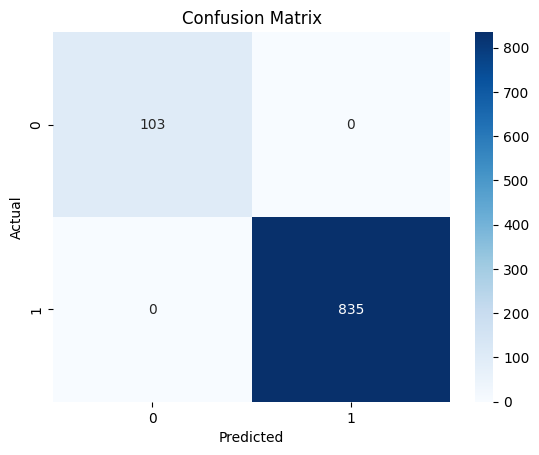

Training Log Loss: 0.00
Test Log Loss: 0.00


In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

log_loss_train = log_loss(y_train, model.predict(X_train))
print(f'Training Log Loss: {log_loss_train:.2f}')
log_loss_test = log_loss(y_test, model.predict(X_test))
print(f'Test Log Loss: {log_loss_test:.2f}')

In [33]:
model_reg = LogisticRegression(penalty='l2', C=0.1)
model_reg.fit(X_train , y_train)
y_pred_reg = model_reg.predict(X_test)
log_loss_train_l2 = log_loss(y_train, model_reg.predict(X_train))
print(f'Training L2 : {log_loss_train_l2:.2f}')
log_loss_test_l2 = log_loss(y_test, model_reg.predict(X_test))
print(f'Test L2 : {log_loss_test_l2:.2f}')    

Training L2 : 0.04
Test L2 : 0.00


C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
model_reg_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model_reg_l1.fit(X_train , y_train)
y_pred_reg_l1 = model_reg_l1.predict(X_test)
log_loss_train_l1 = log_loss(y_train, model_reg_l1.predict(X_train))
print(f'Training L1 : {log_loss_train_l1:.2f}')
log_loss_test_l1 = log_loss(y_test, model_reg_l1.predict(X_test))
print(f'Test L1 : {log_loss_test_l1:.2f}')

Training L1 : 0.00
Test L1 : 0.00


C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A 